In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 7.1\. **Kernel Density Estimate** (40 MINUTES)

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [2]:
# I initialize the inputs
mu,sigma,N,n_sigma=0,3,1000,3
# I extract the array of normally distributed vaues
vect=np.random.normal(loc=mu,scale=sigma,size=N)

995.8676317757147 597.9


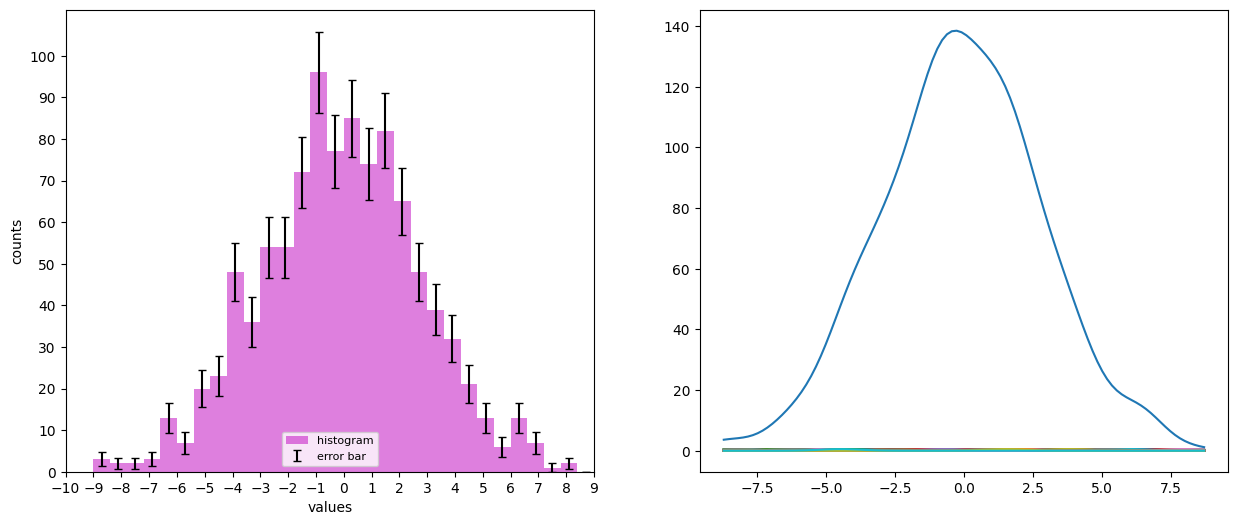

In [40]:
fix,ax=plt.subplots(1,2,figsize=(15,6))
# I set the number of bins as the square root of the amount of data
bins=np.linspace(start=-n_sigma*sigma,stop=+n_sigma*sigma,num = int(np.sqrt(N)))
# and represent the histogram
y,bins,_=ax[0].hist(vect,bins=bins,density=False,label='histogram',color='m',alpha=0.5)
x=(bins[1:]+bins[:-1])/2
ax[0].set_xlim(min(x),max(x))
ax[0].set_xlabel('values')
ax[0].set_ylabel('counts')
ax[0].set_xticks(ticks=np.arange(start=-n_sigma*sigma-1,stop=+n_sigma*sigma+1,step=1))
ax[0].set_yticks(ticks=np.arange(start=0,stop=int(np.max(y))+10,step=10))
ax[0].errorbar(x, y, yerr=np.sqrt(y),fmt='none',label='error bar',capsize=3,ecolor='k')
ax[0].legend(fontsize=8,loc='lower center')

temp = np.linspace(min(x),max(x),num=100)
scale = 1.06*vect.std()*(N)**(-1/5)
output = np.zeros_like(temp)
for loc in vect:
    output += norm.pdf(temp, loc = loc, scale = scale)
    ax[1].plot(temp,norm.pdf(temp, loc = loc, scale = scale))
print( trapz(output,temp) , trapz(y,x) )
ax[1].plot(temp,output)
plt.show()

# 7.2\. **Color-coded scatter plot** (10 MINUTES)

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

https://scipy-lectures.org/intro/matplotlib/auto_examples/plot_scatter.html

In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
def my_data(mean1,mean2,std1,std2,N):
    x = np.random.normal(mean1, std1, N)
    y = np.random.normal(mean2, std2, N)
    return x, y

3 [   3    5    2    1 1000]


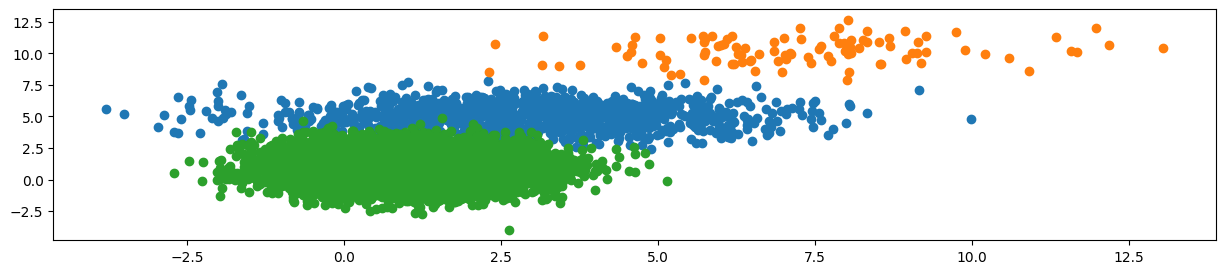

In [43]:
cat_param = np.array([[3,5,2,1,1000], [7,10,2,1,100], [1,1,1,1,10000] ])
print(cat_param.shape[0],cat_param[0])
fig,ax = plt.subplots( 1,1, figsize=(15,3))
for cat in cat_param:
    x, y = my_data(*cat)
    ax.scatter(x,y)

### 3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot